## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from scipy.stats import ttest_ind

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
df = pd.read_parquet("../data/processed/abt_airline_reviews.parquet")
df.head(2)

,airline_name,overall_rating,review_title,review_date,review,aircraft,type_of_traveller,seat_type,route,date_flown,...,date_flown_year_month,review_year,date_flown_year,review_month,date_flown_month,days_difference,rating_category,rating_category_numeric,full_review_text,is_delay
0,Air Seychelles,8,Air Seychelles customer review,2011-04-10,LHR-SEZ-LHR. It's true that there aren't perso...,None,None,Economy Class,None,NaT,...,NaT,2011.0,NaN,4.0,NaN,NaN,Positivo,1,Air Seychelles customer review LHR-SEZ-LHR. It...,0
1,CityJet,1,CityJet customer review,2011-04-10,London City to Antwerp was delayed 3 hours 40 ...,None,None,Economy Class,None,NaT,...,NaT,2011.0,NaN,4.0,NaN,NaN,Negativo,-1,CityJet customer review London City to Antwerp...,1


## Descritiva

In [3]:
df.describe(include="object")

,airline_name,review_title,review,aircraft,type_of_traveller,seat_type,route,review_clean,review_title_clean,review_day_of_week,date_flown_day_of_week,rating_category,full_review_text
count,17367,17367,17367,5664,15952,17249,15875,17367,17367,13557,15943,17367,17367
unique,182,14266,17365,835,4,4,11294,17364,11250,7,7,3,17366
top,Oman Air,Onur Air customer review,Very attentive staff at airport check in and...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,bangkok cairo muscat oman air good service d...,bad experience,Monday,Saturday,Negativo,Tunisair customer review LHR-TUN return to LHR...
freq,100,67,2,768,5780,14785,38,2,174,2198,2972,12289,2


In [4]:
df.describe()

,overall_rating,review_date,date_flown,seat_comfort,cabin_staff_service,food_e_beverages,ground_service,inflight_entertainment,wifi_e_connectivity,review_year,date_flown_year,review_month,date_flown_month,days_difference,rating_category_numeric,is_delay
count,17367.000000,13557,15943,15315.000000,15225.000000,11783.000000,15055.000000,9091.000000,5242.000000,13557.000000,15943.000000,13557.000000,15943.000000,12452.000000,17367.000000,17367.000000
mean,3.001958,2020-06-24 08:22:11.976100864,2021-01-10 04:51:17.262748416,2.604832,2.863580,2.554867,2.330521,2.268177,1.801030,2020.001328,2020.581509,6.257727,6.366995,38.737633,-0.561064,0.402891
min,1.000000,2007-07-12 00:00:00,2014-08-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2007.000000,2014.000000,1.000000,1.000000,-80.000000,-1.000000,0.000000
25%,1.000000,2018-11-20 00:00:00,2019-05-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,2019.000000,4.000000,4.000000,12.000000,-1.000000,0.000000
50%,1.000000,2021-11-07 00:00:00,2022-03-01 00:00:00,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2021.000000,2022.000000,6.000000,6.000000,23.000000,-1.000000,0.000000
75%,5.000000,2023-02-16 00:00:00,2023-02-01 00:00:00,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,2023.000000,2023.000000,9.000000,9.000000,35.000000,0.000000,1.000000
max,9.000000,2023-07-27 00:00:00,2023-08-01 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2023.000000,2023.000000,12.000000,12.000000,1091.000000,1.000000,1.000000
std,2.819230,NaN,NaN,1.456532,1.594329,1.508992,1.591113,1.480500,1.327176,3.272064,2.405273,3.298599,3.325235,61.773803,0.734430,0.490493


In [5]:
df.overall_rating.value_counts(normalize=True).round(2)*100

overall_rating
1    54.0
2    11.0
9     7.0
8     7.0
3     6.0
7     5.0
4     3.0
5     3.0
6     3.0
Name: proportion, dtype: float64

## 1. Distribuição dos Dados

### Overall Rating por Companhias aéreas

In [6]:
top_airlines = df['airline_name'].value_counts().nlargest(15).index

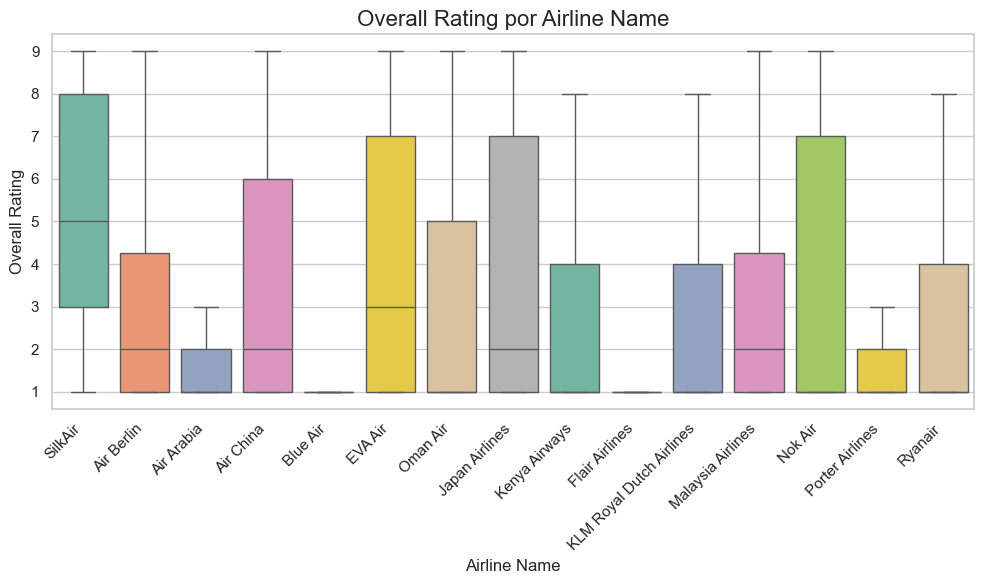

In [7]:
sns.boxplot(
    x='airline_name', 
    y='overall_rating', 
    data=df[df['airline_name'].isin(top_airlines)], 
    showfliers=False,
    palette="Set2"
)
plt.title('Overall Rating por Airline Name', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Airline Name')
plt.ylabel('Overall Rating')
plt.tight_layout()
plt.show()

### Overrall Rating por Aircraft

In [8]:
top_aircraft = df['aircraft'].value_counts().nlargest(15).index

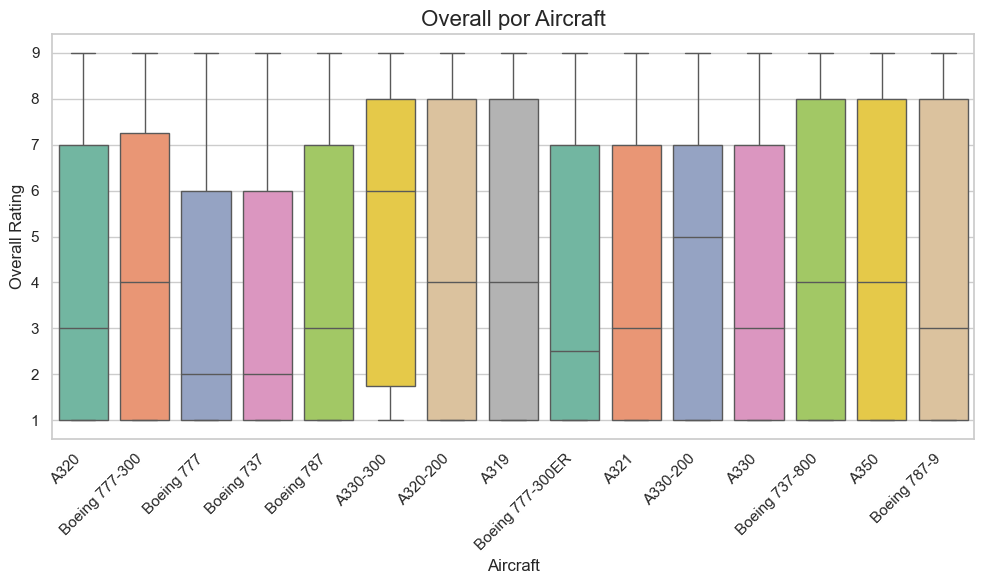

In [9]:
sns.boxplot(
    x='aircraft', 
    y='overall_rating', 
    data=df[df['aircraft'].isin(top_aircraft)], 
    showfliers=False,
    palette="Set2"
)
plt.title('Overall por Aircraft', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aircraft')
plt.ylabel('Overall Rating')
plt.tight_layout()
plt.show()

## 2. Nuvem de Palavras

### Negativo: overall_rating <= 3

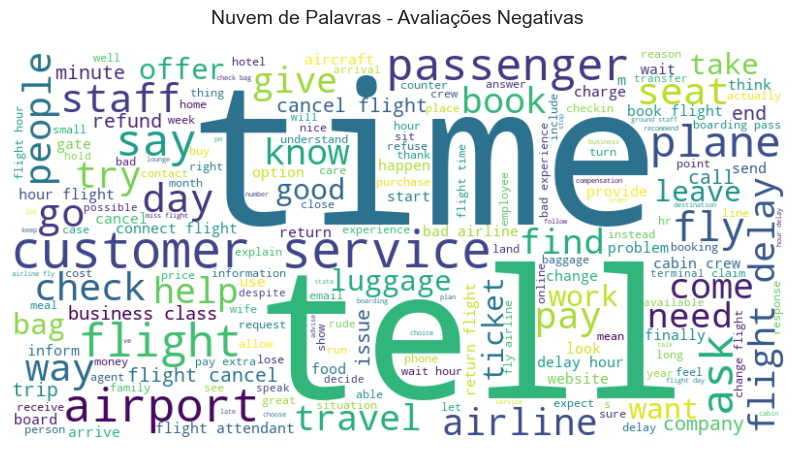

In [10]:
# Filtrar as avaliações negativas
negative_reviews = df[df['rating_category'] == 'Negativo']['review_clean']

# Concatenar todas as avaliações negativas em uma única string
text = " ".join(negative_reviews)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Avaliações Negativas', fontsize=14, pad=20)
plt.show()

### Positivo: overall_rating >=8

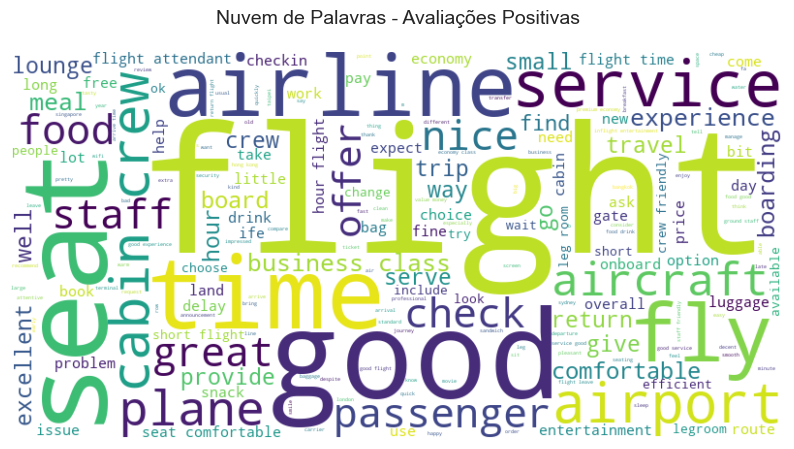

In [11]:
# Filtrar as avaliações positivas
positive_reviews = df[df['rating_category'] == 'Positivo']['review_clean']

# Concatenar todas as avaliações positivas em uma única string
text = " ".join(positive_reviews)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Avaliações Positivas', fontsize=14, pad=20)
plt.show()

## 3. Correlação entre categórias de avaliação

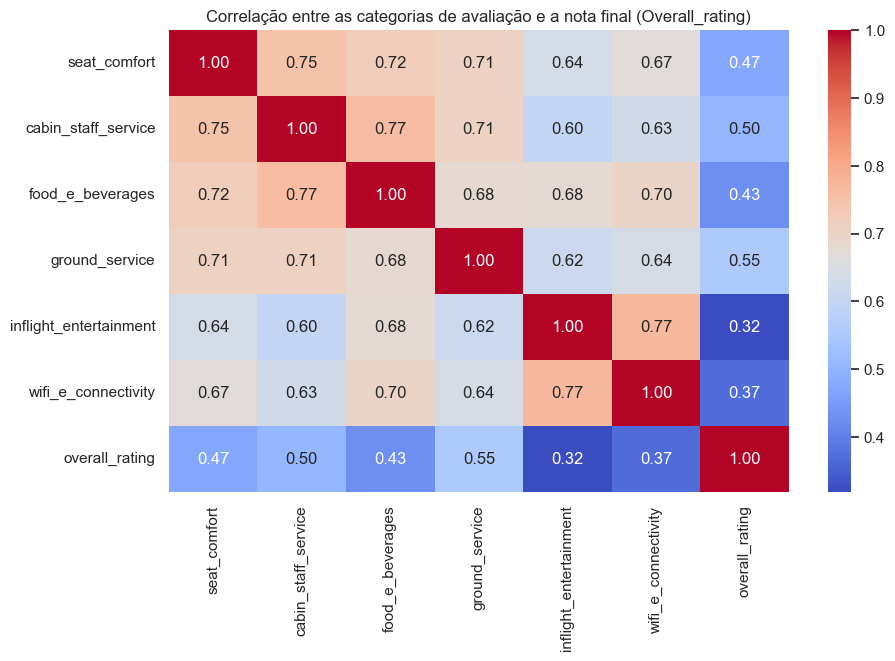

In [12]:
columns_of_interest = [
    'seat_comfort', 
    'cabin_staff_service', 
    'food_e_beverages', 
    'ground_service', 
    'inflight_entertainment', 
    'wifi_e_connectivity', 
    'overall_rating'
]

df_corr = df[columns_of_interest]

correlation_matrix = df_corr.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as categorias de avaliação e a nota final (Overall_rating)", fontsize=12)
plt.show()

## 4. Outras análises

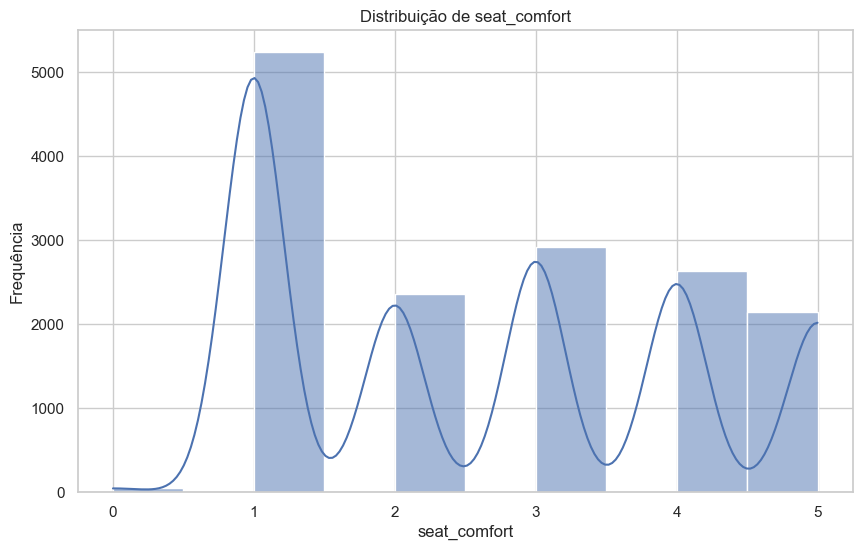

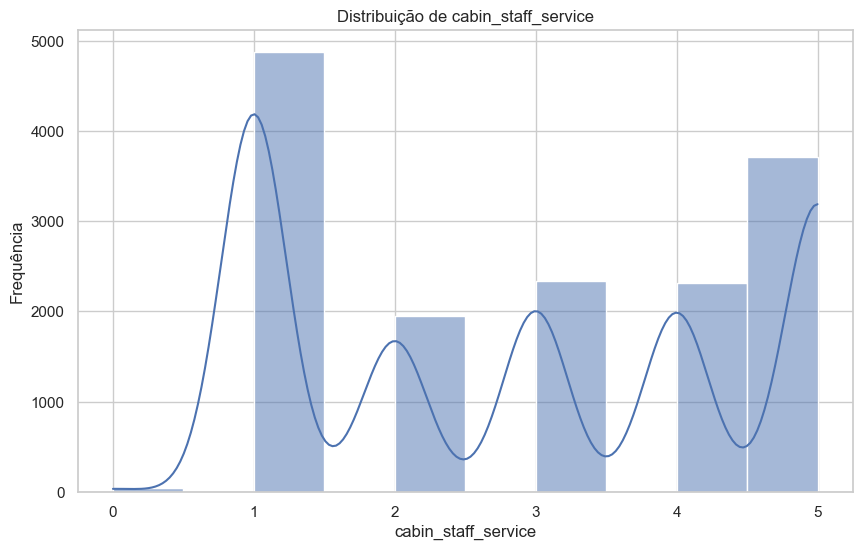

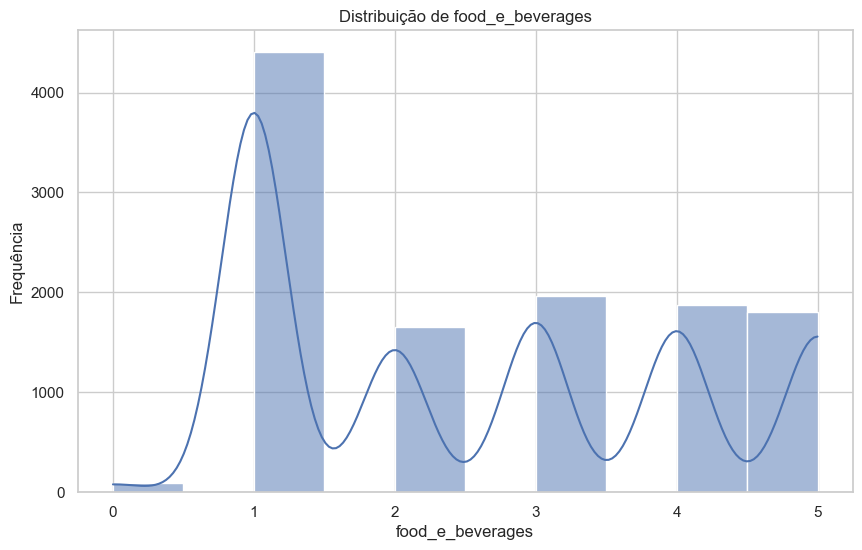

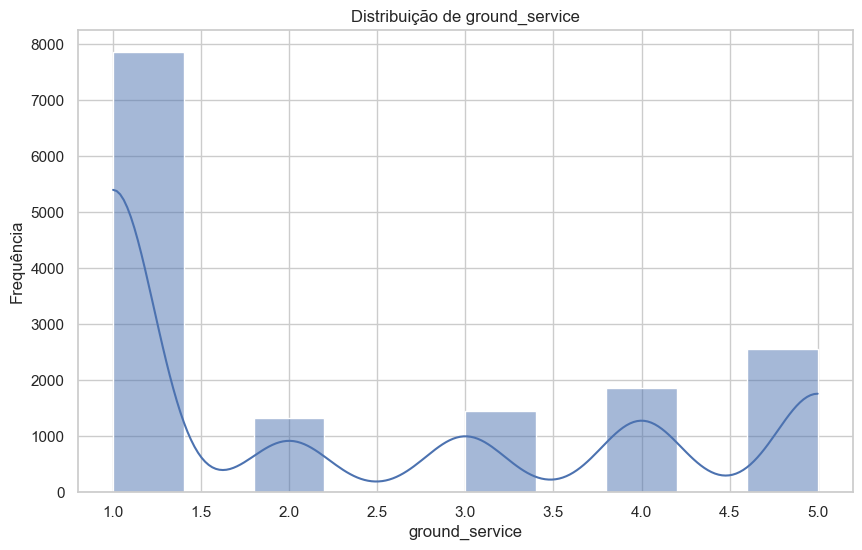

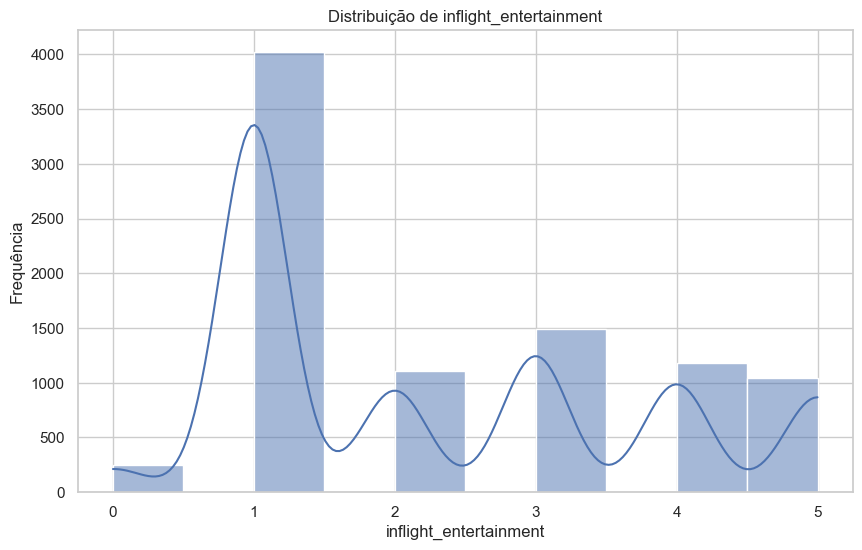

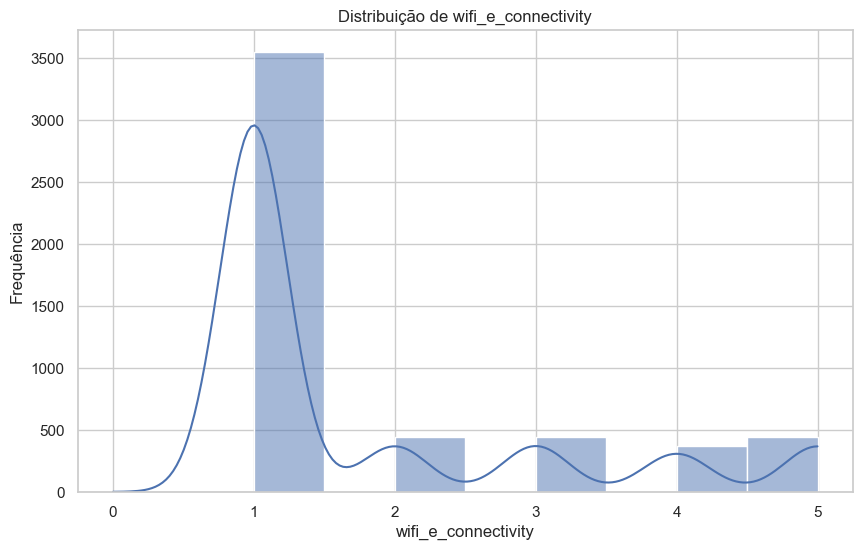

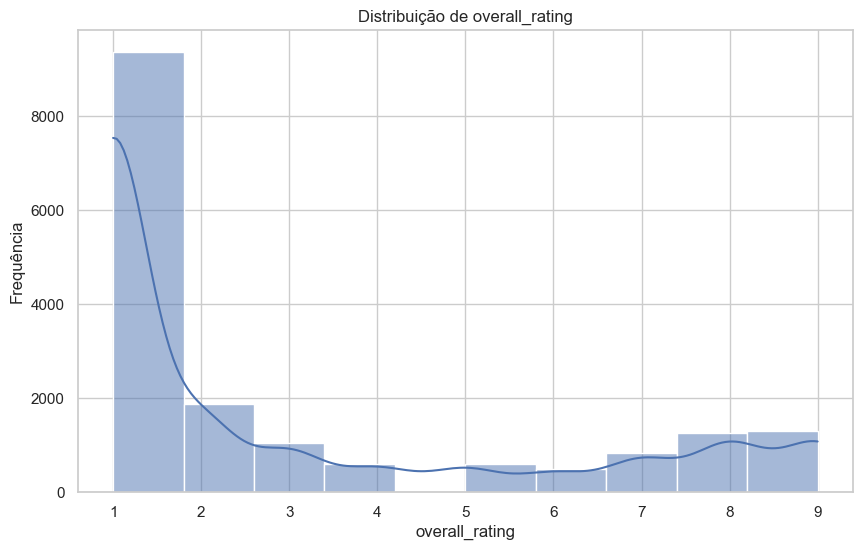

In [13]:
for column in columns_of_interest:
    sns.histplot(df[column].dropna(), kde=True, bins=10)
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.show()

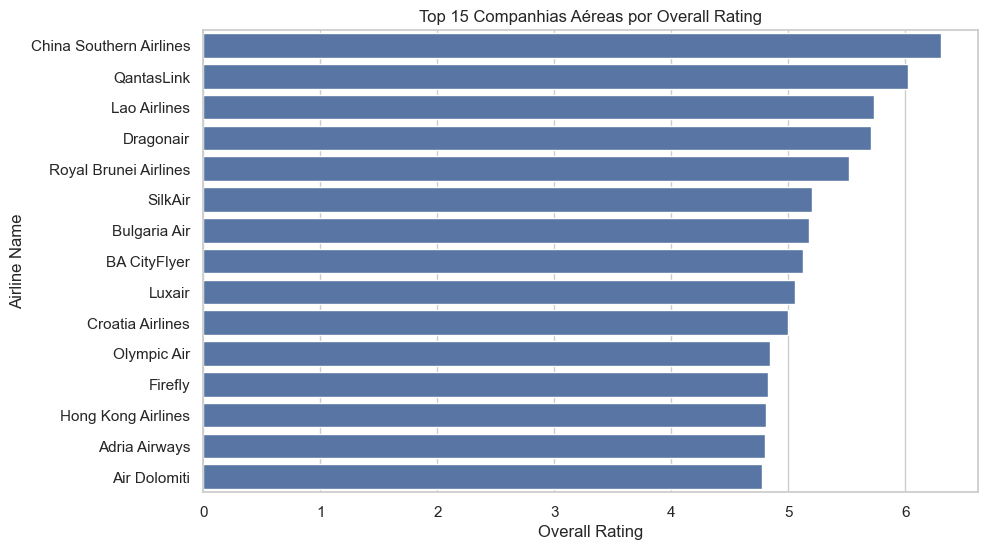

In [14]:
mean_ratings = df.groupby("airline_name")["overall_rating"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=mean_ratings.values, y=mean_ratings.index)
plt.title("Top 15 Companhias Aéreas por Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Airline Name")
plt.show()

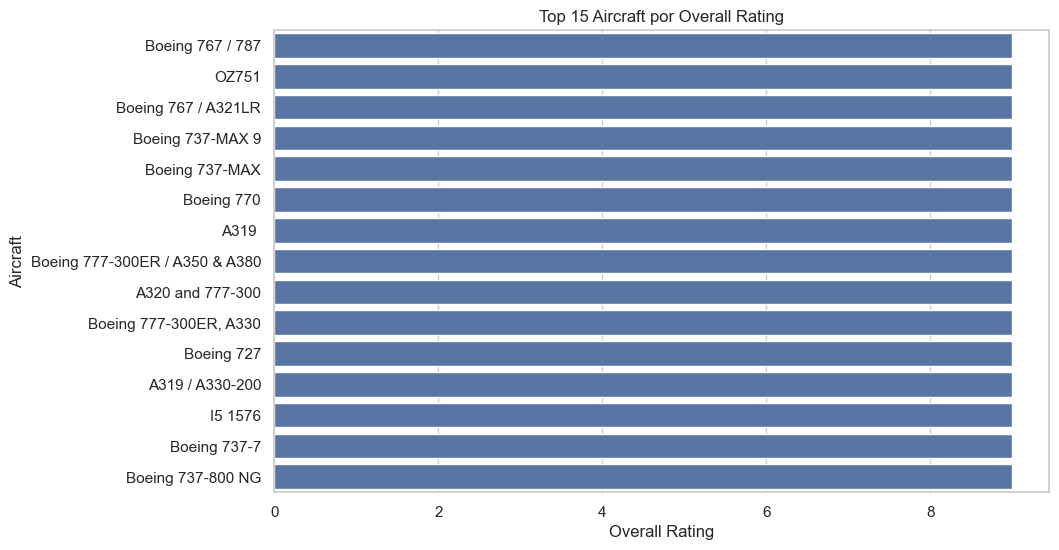

In [15]:
mean_ratings = df.groupby("aircraft")["overall_rating"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=mean_ratings.values, y=mean_ratings.index)
plt.title("Top 15 Aircraft por Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Aircraft")
plt.show()

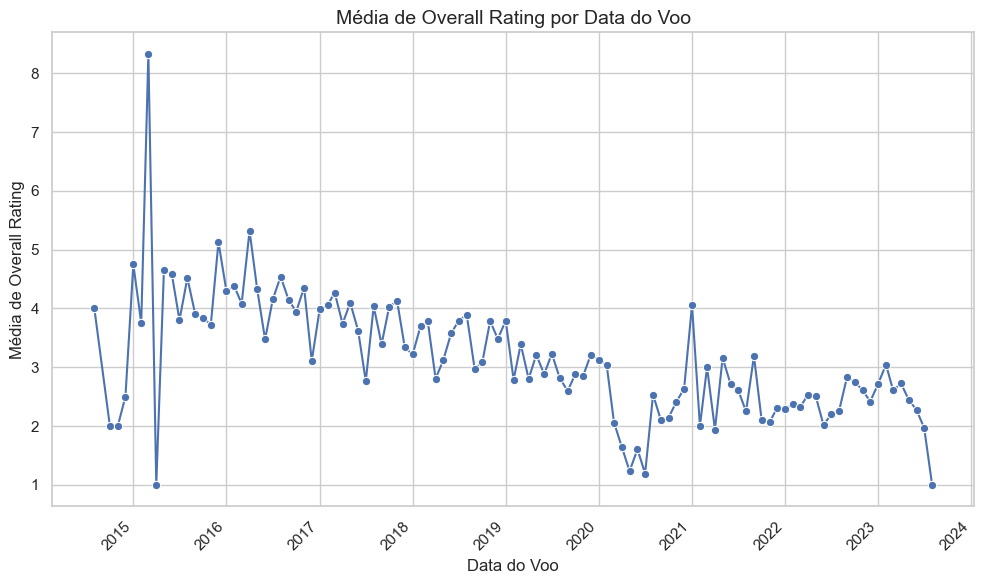

In [16]:
sns.lineplot(
    data=df, 
    x="date_flown", 
    y="overall_rating", 
    estimator="mean", 
    ci=None, 
    marker="o"
)
plt.title("Média de Overall Rating por Data do Voo", fontsize=14)
plt.xlabel("Data do Voo")
plt.ylabel("Média de Overall Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
columns_of_interest_cat = [
    'type_of_traveller',
    'seat_type',
    'review_day_of_week',
    'date_flown_day_of_week', 
    'review_year', 
    'date_flown_year',
    'review_month',
    'date_flown_month',
    'is_delay'

]

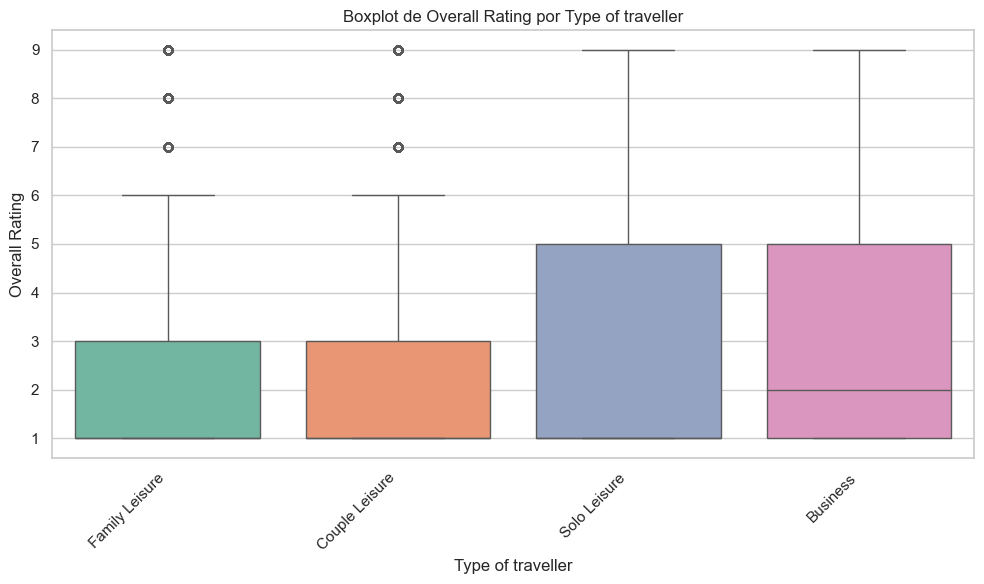

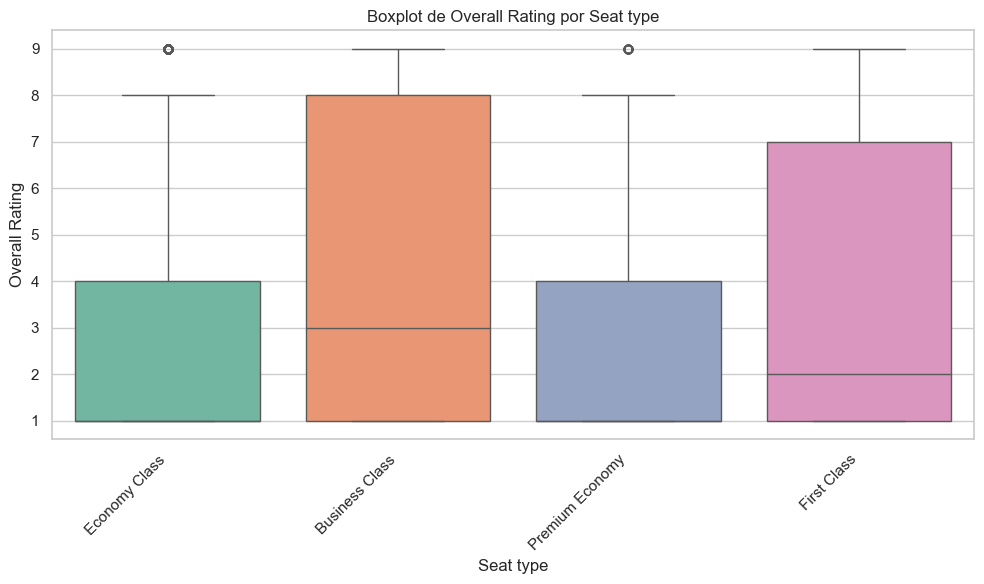

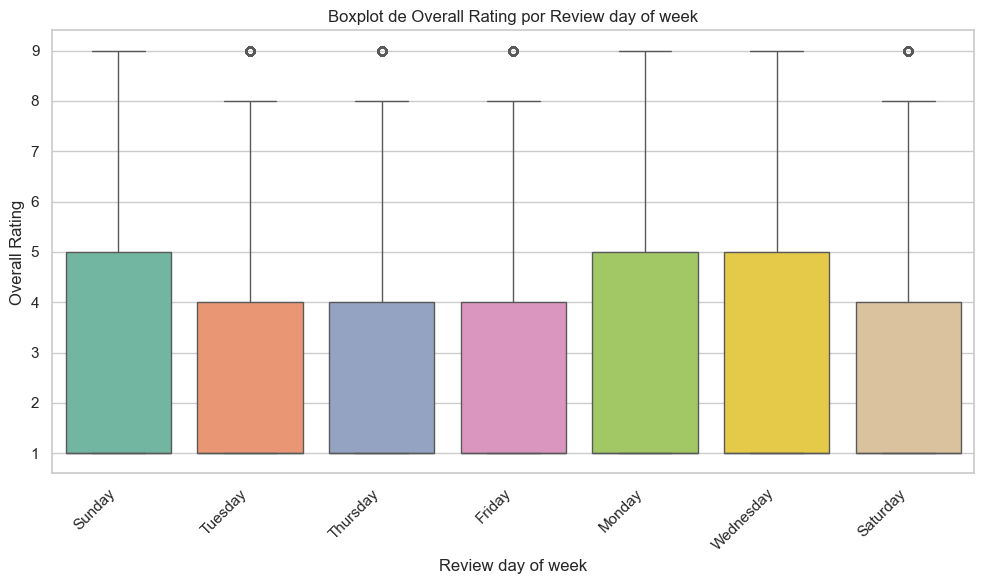

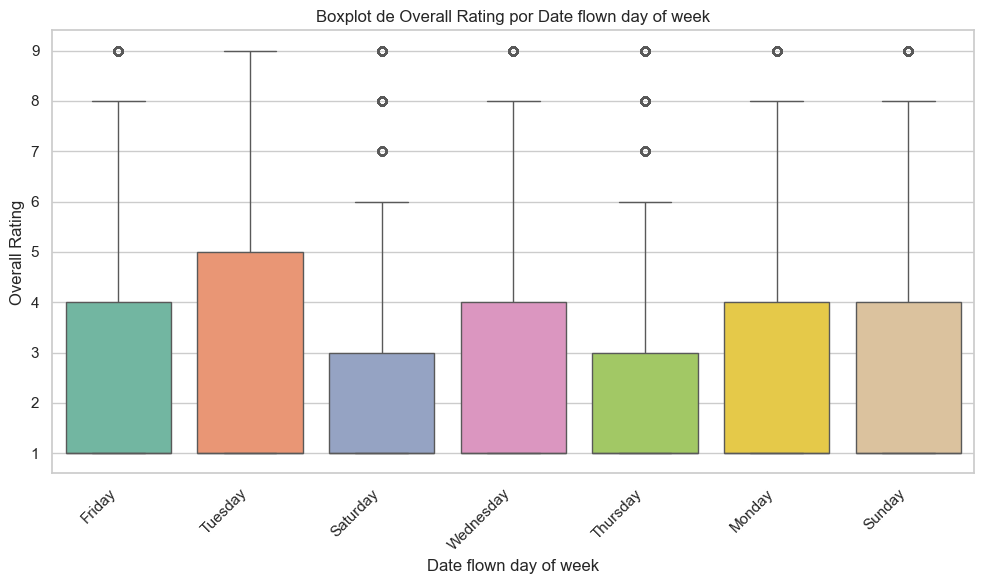

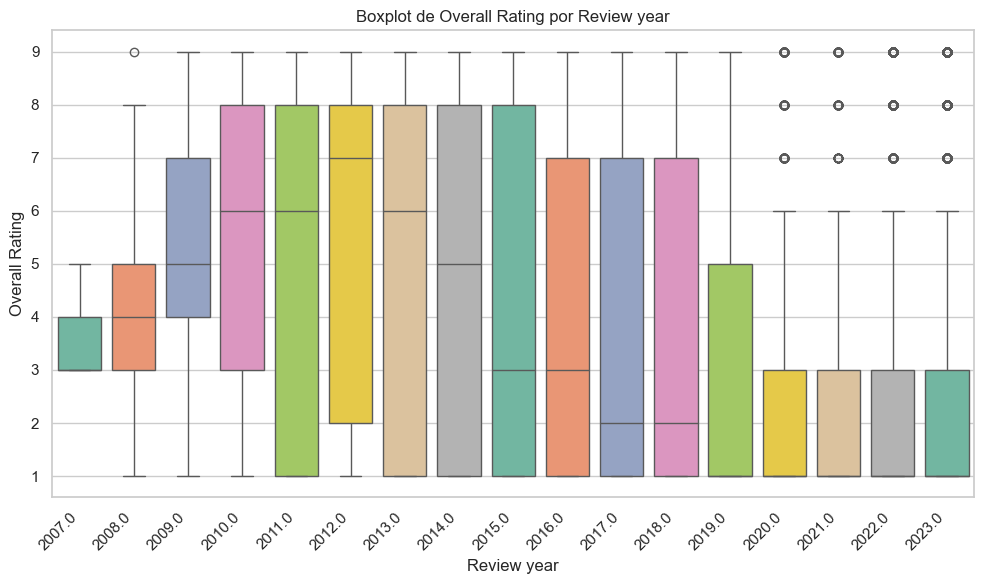

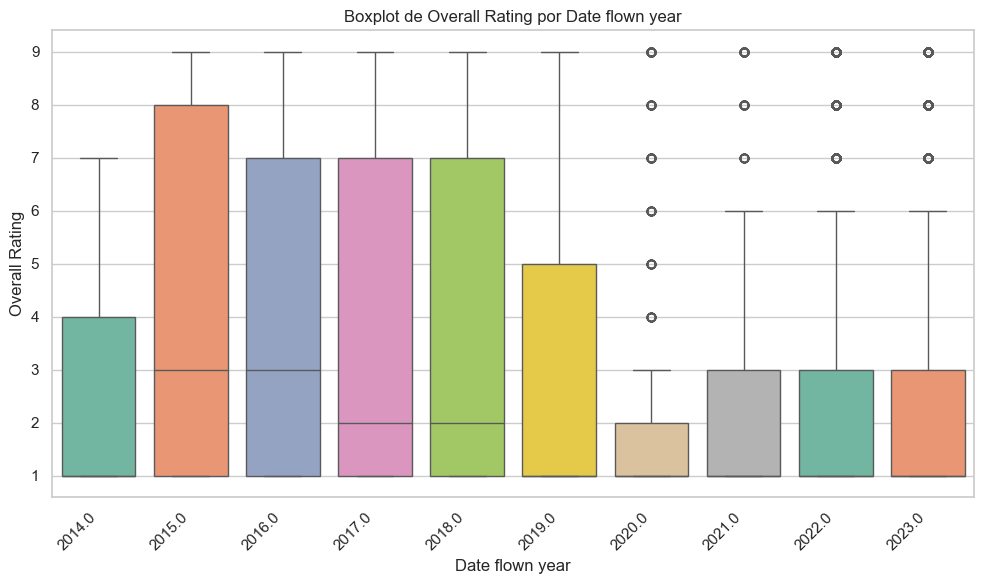

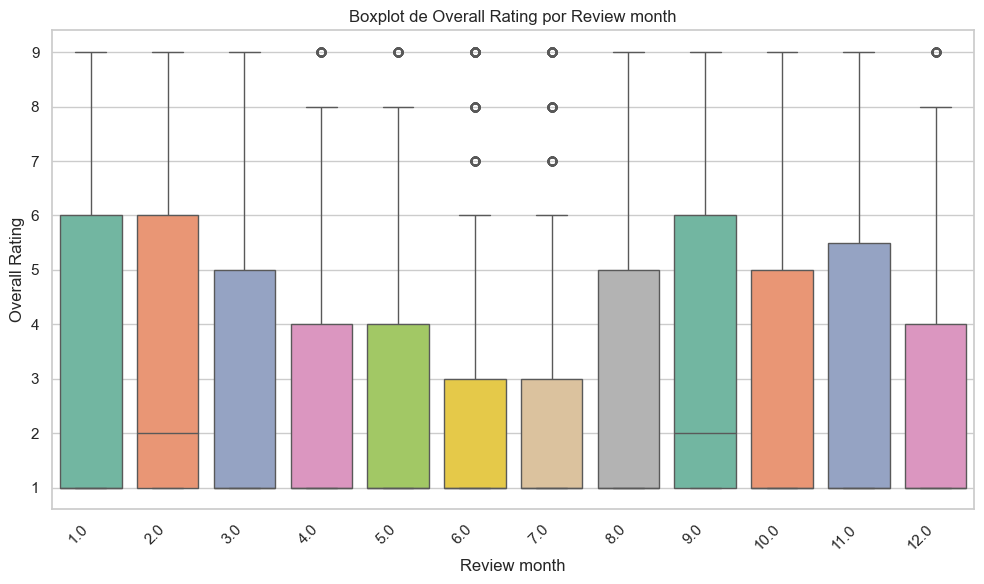

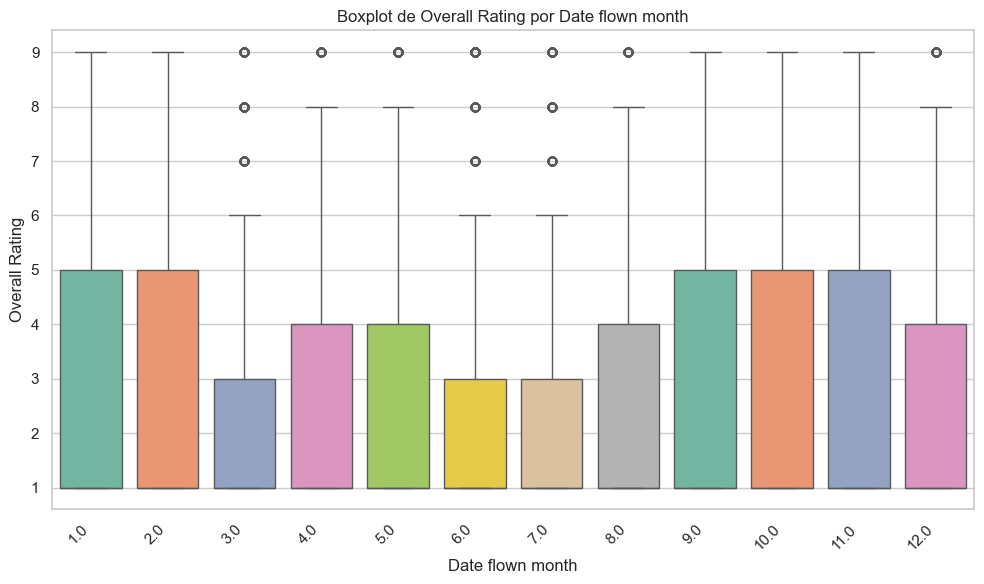

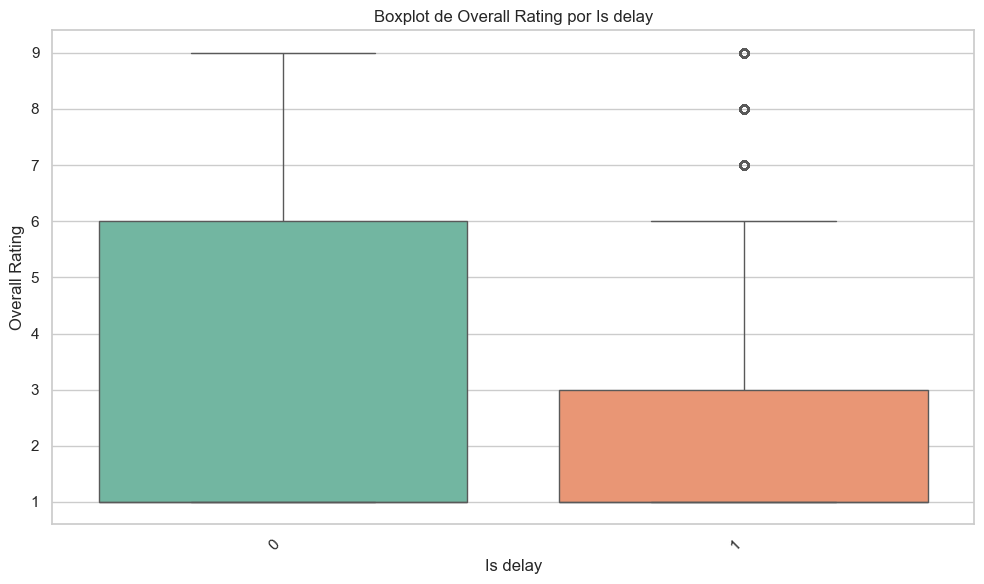

In [18]:
for column in columns_of_interest_cat: 
    sns.boxplot(data=df, x=column, y="overall_rating", palette="Set2") # showfliers=False
    plt.title(f"Boxplot de Overall Rating por {column.replace('_', ' ').capitalize()}")
    plt.xlabel(column.replace('_', ' ').capitalize())
    plt.ylabel("Overall Rating")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 5. Hipóteses

#### i. Atrasos impactam negativamente a avaliação geral (overall_rating)

In [19]:
rating_with_delay = df[df['is_delay'] == 1]['overall_rating']
rating_no_delay = df[df['is_delay'] == 0]['overall_rating']

# Teste t de médias
t_stat, p_val = ttest_ind(rating_with_delay, rating_no_delay, nan_policy='omit')
print(f"p-valor: {p_val:.4f} - {'Significativo' if p_val < 0.05 else 'Não significativo'}")


p-valor: 0.0000 - Significativo


#### ii. Passageiros que voaram em datas próximas ao review tendem a dar notas mais altas (alta confiança na experiência)

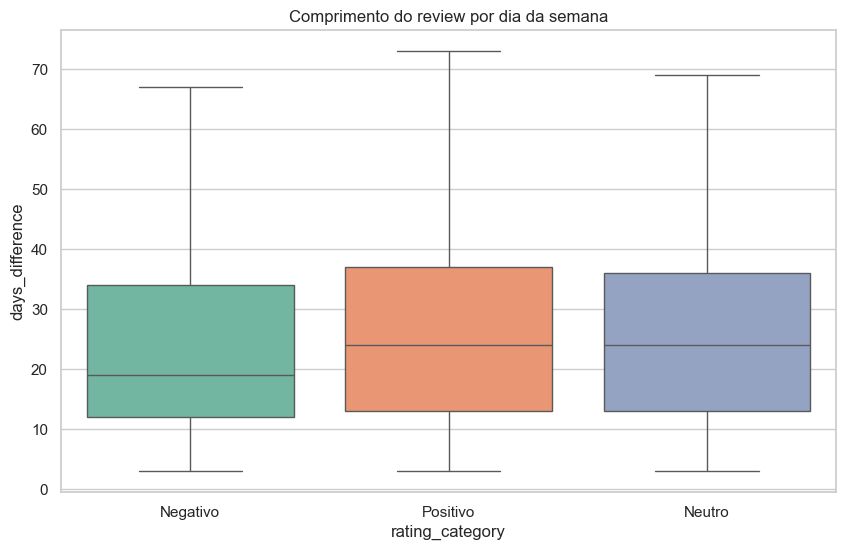

In [21]:
sns.boxplot(data=df[df.days_difference >= 0], x='rating_category', y='days_difference', palette="Set2", showfliers=False)
plt.title("Comprimento do review por dia da semana")
plt.show()

In [22]:
len(df[df.days_difference <1])

5

In [23]:
df[df.days_difference <1]

,airline_name,overall_rating,review_title,review_date,review,aircraft,type_of_traveller,seat_type,route,date_flown,...,date_flown_year_month,review_year,date_flown_year,review_month,date_flown_month,days_difference,rating_category,rating_category_numeric,full_review_text,is_delay
1950,Jet2.com,1,"""would not do this without charges""",2020-06-13,I believe Jet2’s handling of bookings during...,None,Couple Leisure,Economy Class,None,2020-09-01,...,2020-09,2020.0,2020.0,6.0,9.0,-80.0,Negativo,-1,"""would not do this without charges"" I believ...",0
4362,airBaltic,1,"""refused to give me a refund""",2020-05-17,Warsaw to Almaty via Riga. I was cheated by ...,None,Business,Economy Class,Warsaw to Almaty via Riga,2020-06-01,...,2020-06,2020.0,2020.0,5.0,6.0,-15.0,Negativo,-1,"""refused to give me a refund"" Warsaw to Alma...",0
6658,Egyptair,1,"""Cancelled my booking""",2020-06-20,Cancelled my booking without letting me know...,None,Solo Leisure,Economy Class,Berlin to Cairo,2020-07-01,...,2020-07,2020.0,2020.0,6.0,7.0,-11.0,Negativo,-1,"""Cancelled my booking"" Cancelled my booking ...",1
10671,French Bee,1,"""Do not recommend""",2023-06-27,Never got to take the flight. We had booked ...,None,Couple Leisure,Premium Economy,San Francisco to Paris Orly,2023-08-01,...,2023-08,2023.0,2023.0,6.0,8.0,-35.0,Negativo,-1,"""Do not recommend"" Never got to take the fli...",1
11567,Cathay Pacific Airways,1,"""horrendous when it comes to cancelling flights""",2022-08-29,Cathay is a great airline if you get on the ...,None,Solo Leisure,Economy Class,Los Angeles to Hong Kong,2022-11-01,...,2022-11,2022.0,2022.0,8.0,11.0,-64.0,Negativo,-1,"""horrendous when it comes to cancelling flight...",1


#### iii. Reviews mais longos tendem a ser mais negativos (desabafos)

In [24]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

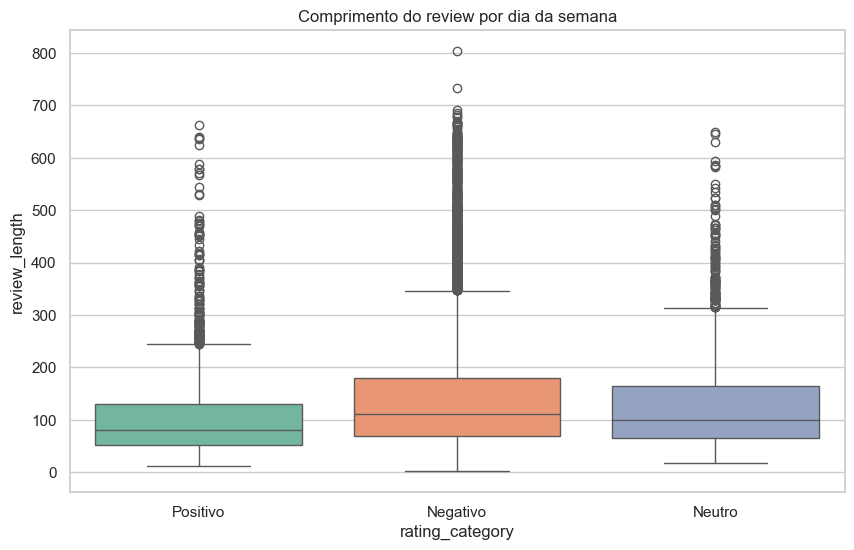

In [25]:
sns.boxplot(data=df, x='rating_category', y='review_length', palette="Set2")
plt.title("Comprimento do review por dia da semana")
plt.show()

#### iv. A presença de atraso altera o NPS de forma significativa.

In [26]:
def calculate_nps(group):
    total = len(group)
    pos = (group['rating_category_numeric'] == 1).sum()
    neg = (group['rating_category_numeric'] == -1).sum()
    return (pos / total - neg / total) * 100 if total > 0 else None

nps = df.groupby('is_delay').apply(calculate_nps)
print(f"NPS sem atraso: {nps[0]:.2f}%")
print(f"NPS com atraso: {nps[1]:.2f}%")


NPS sem atraso: -46.26%
NPS com atraso: -70.70%
